In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten,Input, Activation, Layer, Lambda, BatchNormalization
from keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


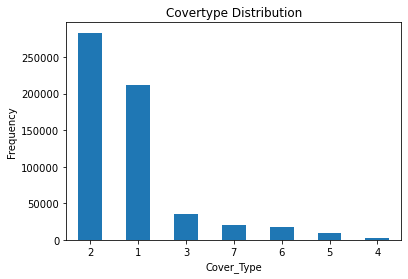

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
#x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
#print(x_val.shape)

(17306, 54)
(1923, 54)


In [17]:
input_data = Input(shape=(54,))#0
encoded = Dense(27, activation='relu')(input_data)#1
encoded = BatchNormalization()(encoded)#2
encoded = Dense(9, activation='relu')(encoded)#3
encoded = BatchNormalization()(encoded)#4
encoded = Dense(3, activation='relu')(encoded)#5
encoded = BatchNormalization()(encoded)#6

decoded = Dense(9, activation='relu')(encoded)#7
decoded = BatchNormalization()(decoded)#8
decoded = Dense(27, activation='relu')(decoded)#9
decoded = BatchNormalization()(decoded)#10
decoded = Dense(54, activation='sigmoid')(decoded)#11

stackautoencoder = Model(input_data, decoded)
stackautoencoder.compile(loss="mse",optimizer='Adam')
stackautoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                1485      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 252       
_________________________________________________________________
batch_normalization_2 (Batch (None, 9)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 30        
_________________________________________________________________
batch_normalization_3 (Batch (None, 3)                 12  

In [18]:
#Autoencoder1
input_data1 = Input(shape=(54,))#0
encoded1 = Dense(27, activation='relu')(input_data1)#1
encoded1 = BatchNormalization()(encoded1)#2
decoded1 = Dense(54, activation='sigmoid')(encoded1)#11

autoencoder1 = Model(input_data1, decoded1)
encoder1 = Model(input_data1, encoded1)

#Autoencoder2
input_data2 = Input(shape=(27,))
encoded2 = Dense(9, activation='relu')(input_data2)#3
encoded2 = BatchNormalization()(encoded2)#4
decoded2 = Dense(27, activation='relu')(encoded2)#9
decoded2 = BatchNormalization()(decoded2)#10

autoencoder2 = Model(input_data2, decoded2)
encoder2 = Model(input_data2, encoded2)

#Autoencoder3
input_data3 = Input(shape=(9,))
encoded3 = Dense(3, activation='relu')(input_data3)#5
encoded3 = BatchNormalization()(encoded3)#6
decoded3 = Dense(9, activation='relu')(encoded3)#7
decoded3 = BatchNormalization()(decoded3)#8

autoencoder3 = Model(input_data3, decoded3)
encoder3 = Model(input_data3, encoded3)

In [19]:
autoencoder1.compile(loss="mse",optimizer='Adam')
autoencoder2.compile(loss="mse",optimizer='Adam')
autoencoder3.compile(loss="mse",optimizer='Adam')

encoder1.compile(loss="mse",optimizer='Adam')
encoder2.compile(loss="mse",optimizer='Adam')
encoder3.compile(loss="mse",optimizer='Adam')

In [20]:
history1 = autoencoder1.fit(x_train, x_train,epochs=200,batch_size=512,shuffle=True,validation_split = 0.30)

Train on 12114 samples, validate on 5192 samples
Epoch 1/200
12114/12114 [==============================] - 0s 36us/step - loss: 0.2365 - val_loss: 0.2123
Epoch 2/200
12114/12114 [==============================] - 0s 7us/step - loss: 0.2127 - val_loss: 0.2001
Epoch 3/200
12114/12114 [==============================] - 0s 7us/step - loss: 0.1909 - val_loss: 0.1833
Epoch 4/200
12114/12114 [==============================] - 0s 6us/step - loss: 0.1657 - val_loss: 0.1587
Epoch 5/200
12114/12114 [==============================] - 0s 8us/step - loss: 0.1346 - val_loss: 0.1265
Epoch 6/200
12114/12114 [==============================] - 0s 8us/step - loss: 0.1010 - val_loss: 0.0939
Epoch 7/200
12114/12114 [==============================] - 0s 7us/step - loss: 0.0716 - val_loss: 0.0677
Epoch 8/200
12114/12114 [==============================] - 0s 7us/step - loss: 0.0503 - val_loss: 0.0497
Epoch 9/200
12114/12114 [==============================] - 0s 7us/step - loss: 0.0367 - val_loss: 0.0378
Epoch

12114/12114 [==============================] - 0s 6us/step - loss: 5.7397e-04 - val_loss: 5.3810e-04
Epoch 77/200
12114/12114 [==============================] - 0s 8us/step - loss: 5.6067e-04 - val_loss: 5.3349e-04
Epoch 78/200
12114/12114 [==============================] - 0s 7us/step - loss: 5.5485e-04 - val_loss: 5.1553e-04
Epoch 79/200
12114/12114 [==============================] - 0s 6us/step - loss: 5.5044e-04 - val_loss: 5.1273e-04
Epoch 80/200
12114/12114 [==============================] - 0s 6us/step - loss: 5.3329e-04 - val_loss: 5.0312e-04
Epoch 81/200
12114/12114 [==============================] - 0s 6us/step - loss: 5.2315e-04 - val_loss: 4.9694e-04
Epoch 82/200
12114/12114 [==============================] - 0s 6us/step - loss: 5.1368e-04 - val_loss: 4.7413e-04
Epoch 83/200
12114/12114 [==============================] - 0s 6us/step - loss: 5.0931e-04 - val_loss: 4.6596e-04
Epoch 84/200
12114/12114 [==============================] - 0s 8us/step - loss: 5.0564e-04 - val_loss

12114/12114 [==============================] - 0s 6us/step - loss: 2.1604e-04 - val_loss: 1.8278e-04
Epoch 148/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.1843e-04 - val_loss: 1.7882e-04
Epoch 149/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.1399e-04 - val_loss: 1.7880e-04
Epoch 150/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.1342e-04 - val_loss: 1.7742e-04
Epoch 151/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.0769e-04 - val_loss: 1.7539e-04
Epoch 152/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.0793e-04 - val_loss: 1.6959e-04
Epoch 153/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.0569e-04 - val_loss: 1.7061e-04
Epoch 154/200
12114/12114 [==============================] - 0s 6us/step - loss: 2.0475e-04 - val_loss: 1.7450e-04
Epoch 155/200
12114/12114 [==============================] - 0s 7us/step - loss: 2.0593e-04 - 

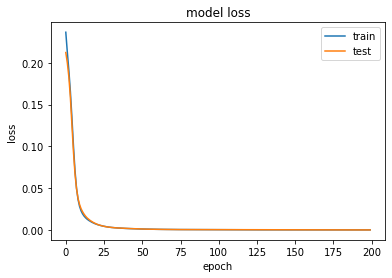

In [21]:
# AE1: lot training loss and validation split loss over the epochs

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE1_model_loss.png')
plt.show()

In [22]:
first_layer_code = encoder1.predict(x_train)
print(first_layer_code.shape)

(17306, 27)


In [23]:
history2 = autoencoder2.fit(first_layer_code, first_layer_code,epochs=200,batch_size=512,shuffle=True, validation_split = 0.30)

Train on 12114 samples, validate on 5192 samples
Epoch 1/200
12114/12114 [==============================] - 0s 33us/step - loss: 3.0862 - val_loss: 2.6675
Epoch 2/200
12114/12114 [==============================] - 0s 5us/step - loss: 2.7763 - val_loss: 2.4651
Epoch 3/200
12114/12114 [==============================] - 0s 5us/step - loss: 2.5145 - val_loss: 2.2724
Epoch 4/200
12114/12114 [==============================] - 0s 5us/step - loss: 2.2863 - val_loss: 2.1010
Epoch 5/200
12114/12114 [==============================] - 0s 5us/step - loss: 2.0887 - val_loss: 1.9548
Epoch 6/200
12114/12114 [==============================] - 0s 5us/step - loss: 1.8736 - val_loss: 1.8301
Epoch 7/200
12114/12114 [==============================] - 0s 5us/step - loss: 1.6875 - val_loss: 1.7119
Epoch 8/200
12114/12114 [==============================] - 0s 5us/step - loss: 1.5307 - val_loss: 1.5964
Epoch 9/200
12114/12114 [==============================] - 0s 5us/step - loss: 1.3854 - val_loss: 1.4730
Epoch

Epoch 78/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4236 - val_loss: 0.4553
Epoch 79/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4219 - val_loss: 0.4491
Epoch 80/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4211 - val_loss: 0.4461
Epoch 81/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4193 - val_loss: 0.4449
Epoch 82/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4195 - val_loss: 0.4397
Epoch 83/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4194 - val_loss: 0.4365
Epoch 84/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4180 - val_loss: 0.4313
Epoch 85/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4171 - val_loss: 0.4284
Epoch 86/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.4155 - val_loss: 0.4249
Epoch 87/200
12114/12114 [====================

12114/12114 [==============================] - 0s 5us/step - loss: 0.3903 - val_loss: 0.3932
Epoch 155/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3898 - val_loss: 0.3926
Epoch 156/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3894 - val_loss: 0.3926
Epoch 157/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3890 - val_loss: 0.3928
Epoch 158/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3904 - val_loss: 0.3932
Epoch 159/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3907 - val_loss: 0.3931
Epoch 160/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3908 - val_loss: 0.3927
Epoch 161/200
12114/12114 [==============================] - 0s 6us/step - loss: 0.3893 - val_loss: 0.3927
Epoch 162/200
12114/12114 [==============================] - 0s 6us/step - loss: 0.3893 - val_loss: 0.3927
Epoch 163/200
12114/12114 [========================

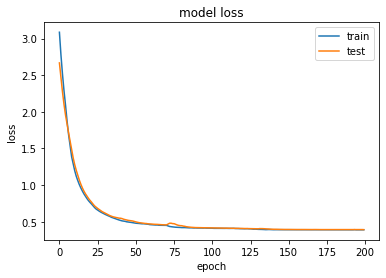

In [24]:
# AE2: lot training loss and validation split loss over the epochs

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE2_model_loss.png')
plt.show()

In [25]:
second_layer_code = encoder2.predict(first_layer_code)
print(first_layer_code.shape)

(17306, 27)


In [26]:
history3 = autoencoder3.fit(second_layer_code, second_layer_code,epochs=200,batch_size=512,shuffle=True,validation_split = 0.30)

Train on 12114 samples, validate on 5192 samples
Epoch 1/200
12114/12114 [==============================] - 0s 29us/step - loss: 1.3937 - val_loss: 0.8443
Epoch 2/200
12114/12114 [==============================] - 0s 4us/step - loss: 1.2587 - val_loss: 0.8159
Epoch 3/200
12114/12114 [==============================] - 0s 4us/step - loss: 1.1469 - val_loss: 0.7835
Epoch 4/200
12114/12114 [==============================] - 0s 4us/step - loss: 1.0639 - val_loss: 0.7608
Epoch 5/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.9931 - val_loss: 0.7517
Epoch 6/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.9418 - val_loss: 0.7417
Epoch 7/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.8987 - val_loss: 0.7318
Epoch 8/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.8607 - val_loss: 0.7191
Epoch 9/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.8258 - val_loss: 0.7060
Epoch

Epoch 78/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3498 - val_loss: 0.3504
Epoch 79/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3493 - val_loss: 0.3497
Epoch 80/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3486 - val_loss: 0.3494
Epoch 81/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3486 - val_loss: 0.3491
Epoch 82/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3480 - val_loss: 0.3490
Epoch 83/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3480 - val_loss: 0.3483
Epoch 84/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3478 - val_loss: 0.3481
Epoch 85/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3483 - val_loss: 0.3482
Epoch 86/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3478 - val_loss: 0.3478
Epoch 87/200
12114/12114 [====================

12114/12114 [==============================] - 0s 5us/step - loss: 0.3195 - val_loss: 0.3181
Epoch 155/200
12114/12114 [==============================] - 0s 5us/step - loss: 0.3195 - val_loss: 0.3183
Epoch 156/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3197 - val_loss: 0.3182
Epoch 157/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3195 - val_loss: 0.3184
Epoch 158/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3196 - val_loss: 0.3178
Epoch 159/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3192 - val_loss: 0.3177
Epoch 160/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3187 - val_loss: 0.3179
Epoch 161/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3192 - val_loss: 0.3178
Epoch 162/200
12114/12114 [==============================] - 0s 4us/step - loss: 0.3189 - val_loss: 0.3177
Epoch 163/200
12114/12114 [========================

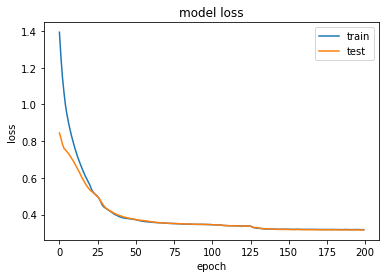

In [27]:
# AE3: lot training loss and validation split loss over the epochs

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('stackAE3_model_loss.png')
plt.show()

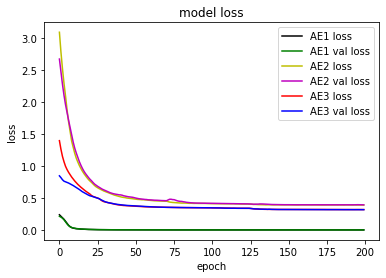

In [37]:
# AE: lot training loss and validation split loss over the epochs
plt.plot(history1.history['loss'],'k',label='AE1 loss')
plt.plot(history1.history['val_loss'],'g',label='AE1 val loss')
plt.plot(history2.history['loss'],'y',label='AE2 loss')
plt.plot(history2.history['val_loss'],'m',label='AE2 val loss')
plt.plot(history3.history['loss'],'r',label='AE3 loss')
plt.plot(history3.history['val_loss'],'b',label='AE3 val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.savefig('stackAEwhole_model_loss.png')
plt.show()

In [28]:
#Stacked autoencoder
stackautoencoder.layers[1].set_weights(autoencoder1.layers[1].get_weights()) # first dense layer
stackautoencoder.layers[2].set_weights(autoencoder1.layers[2].get_weights())
stackautoencoder.layers[3].set_weights(autoencoder2.layers[1].get_weights())
stackautoencoder.layers[4].set_weights(autoencoder2.layers[2].get_weights())
stackautoencoder.layers[5].set_weights(autoencoder3.layers[1].get_weights())
stackautoencoder.layers[6].set_weights(autoencoder3.layers[2].get_weights())
stackautoencoder.layers[7].set_weights(autoencoder3.layers[3].get_weights())
stackautoencoder.layers[8].set_weights(autoencoder3.layers[4].get_weights())
stackautoencoder.layers[9].set_weights(autoencoder2.layers[3].get_weights())
stackautoencoder.layers[10].set_weights(autoencoder2.layers[4].get_weights())
stackautoencoder.layers[11].set_weights(autoencoder1.layers[3].get_weights())

In [29]:
evaluation = stackautoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 57us/step
Loss: 0.029178145503818028


In [30]:
stackencoder = Model(input_data, encoded)
latent_vector_train = stackencoder.predict(x_train)
latent_vector = stackencoder.predict(x_test)

In [31]:
latent_vector.shape

(1923, 3)

In [32]:
latent_vector

array([[-0.73581934, -0.64752364, -0.6609732 ],
       [ 0.20502543,  0.5958979 , -0.6925757 ],
       [-0.4020483 ,  0.8130815 , -0.43520844],
       ...,
       [ 0.6785526 ,  1.6870768 ,  0.3769542 ],
       [-0.9377532 , -0.42586055, -0.62777877],
       [ 0.68277335,  1.6979425 ,  0.31799233]], dtype=float32)

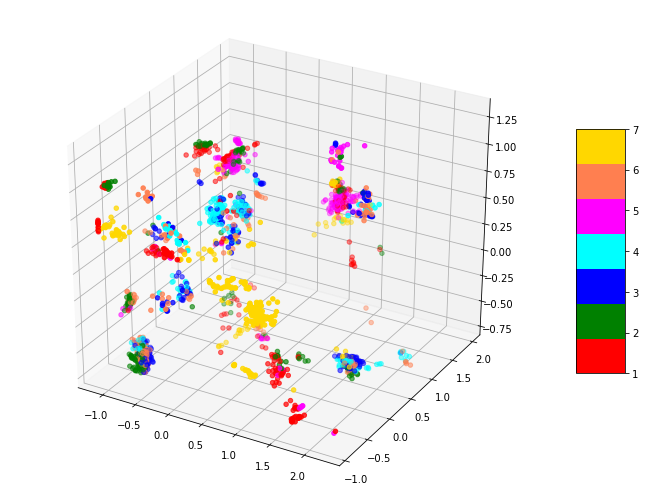

In [33]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('StackAE_3d_new.png')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.8169526781071242 and k :  [2]


In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.47269890795631825
Mean Squared Error: 1.5169006760270412
Root Mean Squared Error: 1.2316252173559297
[[214  27   0   3  23   0   2]
 [  8 222   9   2   5  23   0]
 [  0  10 185  39   0  33   0]
 [  5   4  34 200   1  22   0]
 [ 22   4   0   2 256   1   1]
 [  2  28  31  12   2 198   1]
 [  5   0   3   0   1   0 283]]
              precision    recall  f1-score   support

           1       0.84      0.80      0.82       269
           2       0.75      0.83      0.79       269
           3       0.71      0.69      0.70       267
           4       0.78      0.75      0.76       266
           5       0.89      0.90      0.89       286
           6       0.71      0.72      0.72       274
           7       0.99      0.97      0.98       292

    accuracy                           0.81      1923
   macro avg       0.81      0.81      0.81      1923
weighted avg       0.81      0.81      0.81      1923

